## Experiment Person 2

1. Person: Nathan Faucett
2. Time to create: approx. 1 hour
3. Questions: 21
4. Time per Question: approx. 2-3 minutes
5. Dataset: v1.0_en

In [7]:
from importlib import reload
import re
import sys
sys.path.append('../')
import libs.stats as stats
import libs.utils as utils
import numpy as np
import pandas as pd
import asag_regex as asag_re
import json
reload(asag_re)

<module 'asag_regex' from '/home/che/Work/research/masters_project/automatic_question_answering/research/notebooks/research_full/paper/01_regex_experiments/asag_regex.py'>

In [3]:
# import the data
df = asag_re.read_df('../datasets/asag_v1_en.csv')
display(df.head(3))

# import the user annotated dataset
df_p2 = asag_re.read_df('./results/nathan/asag_regex_p2_nathan.csv')
display(df_p2.head(3))
print('Size: {}'.format(len(df_p2)))

AID  QID                                   Prompt  \
0    1    1  What does a function signature include?   
1    1    1  What does a function signature include?   
2    1    1  What does a function signature include?   

                                        Model Answer  Score  SID  \
0  The name of the function and the types of the ...    4.5    6   
1  The name of the function and the types of the ...    3.0    5   
2  The name of the function and the types of the ...    5.0    8   

                                      Student Answer  
0  It includes the name of the program, the type ...  
1  it includes the specific information about the...  
2  The function signature includes the name of th...

AID  QID                                          Prompt  \
0    1    1         What does a function signature include?   
1    1    2          What is the scope of global variables?   
2    1    3  How does the compiler handle inline functions?   

                                        Model Answer  \
0  The name of the function and the types of the ...   
1                                        File scope.   
2  It makes a copy of the function code in every ...   

                                 Full Credit Matches  \
0  {\n    "name_of_function" : [\n        "names?...   
1  {\n    "global_scope" : [\n        "[file,scop...   
2  {\n  "copy_of_function": [\n    "(create|make)...   

                              Partial Credit Matches  
0  {\n    "name_of_function" : [\n        "(funct...  
1                                                 {}  
2                                                 {}

Size: 21


In [4]:
reload(asag_re)
result = asag_re.evaluate_regex(df, df_p2)

In [5]:
result.keys()

dict_keys(['y_true', 'y_pred', 'y_raw_true', 'y_raw_pred', 'match_info', 'missed_items', 'hit_items'])

## Evaluation of Results

Accuracy: 11.27%
Precision: 36.37%
Recall: 11.27%
F1-Measure: 14.60%
Pearson's R: 0.28
Cohen's Kappa: 0.03
RMSE: 3.57
Y-True Mean: 4.03
Y-Pred Mean: 0.95
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.72


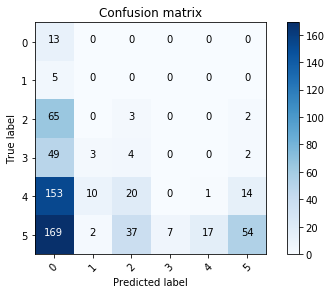

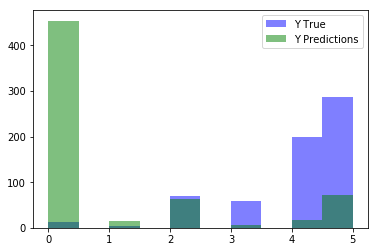

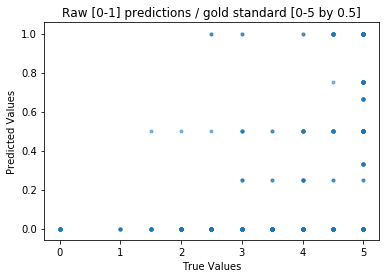

Avg. Difference: 3.163
Std.Deviation of Difference: 1.648


In [7]:
sm.print_big4(result['y_true'], result['y_pred'])
sm.print_stats(result['y_true'], result['y_pred'])
sm.plot_confusion_matrix(sm.cm(result['y_true'], result['y_pred']), np.arange(6))
sm.plot_histogram_comparison(result['y_true'], result['y_pred'], bins=10)
sm.plot_scatter(result['y_raw_true'], result['y_raw_pred'])
sm.diff_stats(result['y_true'], result['y_pred'])

In [18]:
display(np.random.choice(result['missed_items'], 10))

array([262, 291, 263, 193, 569, 174, 377, 505, 148, 559])

In [25]:
indices = [262, 291, 263, 193, 569, 174, 377, 505, 148, 559]

def display_miss(miss, df):
    print('{}.{} [{}].'.format(miss['AID'], miss['QID'], miss['Score']))
    print("PROMPT: {}".format(miss['Prompt']))
    print("RESPONSE: {}".format(miss['Student Answer']))
    fcm = df[np.logical_and(df['AID'] == miss['AID'], df['QID'] == miss['QID'])].iloc[0]['Full Credit Matches']
    pcm = df[np.logical_and(df['AID'] == miss['AID'], df['QID'] == miss['QID'])].iloc[0]['Partial Credit Matches']
    print(fcm)
    print(pcm)

    
for idx in indices:
    display_miss(df.loc[idx, :], df_p2)


2.2 [5.0].
PROMPT: What is the difference between a data member and a local variable inside a member function?
RESPONSE: local variables can only be used within the function, where as data members can be set to public access and can be used throughout
{
  "data_members.": [
    "(data|members).*(accessed|used).*(inside|within).*(class|definition)"
  ],
  "local_vars": [
    "(local|variables).*(accessed|used).*(inside|within).*(member|function|method|block).*(defined|defines|declared)"
  ]
}
{}
2.3 [3.0].
PROMPT: What is the difference between a constructor and a function?
RESPONSE: A constructor is used to create an object that can be employed in the main function of a program.  This may or may not execute code along with it.A function is a set of code that executes when called, but does not create a new object.
{
  "constructor.": [
    "(constructor).*(called|used).*(created|initiated)"
  ],
  "function": [
    "(functions?|methods?).*(called|used).*(explicitely|directly)"
  ],
  "c

Accuracy: 28.730%
Precision: 86.512%
Recall: 28.730%
F1-Measure: 29.449%
Pearson's R: 0.15
Cohen's Kappa: 0.05
RMSE: 0.84
MAE: 0.71
Y-True Mean: 0.86
Y-Pred Mean: 0.15
Y-True Std Deviation: 0.35
Y-Pred Std Deviation: 0.36


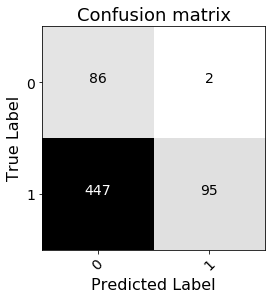

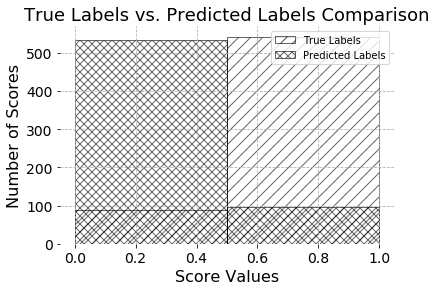

In [9]:
reload(stats)
y_true_pf = utils.convert_to_pass_fail(result['y_true'])
y_pred_pf = utils.convert_to_pass_fail(result['y_pred'])

stats.print_big4(y_true_pf, y_pred_pf)
stats.print_stats(y_true_pf, y_pred_pf)
stats.plot_confusion_matrix(stats.cm(y_true_pf, y_pred_pf), np.arange(2), savefile='./renderings/exp2/e2_pf')
stats.plot_histogram_comparison(y_true_pf, y_pred_pf, bins=2, savefile='./renderings/exp2/e2_pf')